# Основная задача:

Часть 1.

1. Приоритизировать гипотезы, которые подготовил отдел маркетинга для увеличения выручки.
2. Запустить А/В тест и проанализировать результаты тестирования.

Часть 2.
1. После проведения А/В теста проанализировать результаты. 
2. Построить графики кумулятивной выручки и среднего чека.
3. Посчитать 95-й и 99-й перцентили количества заказов на пользователя
4. Построить точечный график стоимостей заказов. 
5. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами и различий в среднем чеке заказа по «очищенным» данным.
6. Написать выводы и решить, что делать по результатам А/В теста.


# Часть 1. Приоритизация гипотез.


# Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
#импортируем таблицу
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [2]:
display(data.head(10))
pd.options.display.max_colwidth = 100

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
display(data.info())
data.columns = data.columns.str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

In [4]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
data_new = data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)
display(round(data_new, 2))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самые приоритетные гипотезы согласно этой оценке:
1. Запустить акцию, дающую скидку на товар в день рождения.
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

In [5]:
#Примениv фреймворк RICE для приоритизации гипотез. Отсортируtv их по убыванию приоритета.
data['RICE']=(data['reach']*data['impact']*data['confidence'])/data['efforts']
display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Согласно этой оценке самые приоритетные гипотезы: 
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.   
2.  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний.
3.   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.   

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


Если при применении ICE в приоритете были гипотезы 8, 0, 7, то при применении RICE в приоритете: 7, 2 и 0.
Так как в RICE затронута четвертая метрика Reach, то результаты в разных методахбудут отличаться. Метрика Reach
показывает скольких пользователей затронет изменение, которое вы хотите внести.

# Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [6]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [7]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [10]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
#переведем столбец date в формат datetime
orders['date'] = pd.to_datetime(orders['date'])

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
#переведем столбец date в формат datetime
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
# посчитаем количество пропусков
display('Количество пропусков в таблице visitors:', visitors.isna().sum()) 
display('Количество пропусков в таблице orders:', orders.isna().sum()) 

'Количество пропусков в таблице visitors:'

date        0
group       0
visitors    0
dtype: int64

'Количество пропусков в таблице orders:'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [16]:
# посчитаем количество дубликатов
display('Количество дубликатов в таблице visitors:', visitors.duplicated().sum()) 
display('Количество дубликатов в таблице orders:', orders.duplicated().sum()) 

'Количество дубликатов в таблице visitors:'

0

'Количество дубликатов в таблице orders:'

0

In [17]:
#посмотрим сколько у нас групп в А/В тесте

display(visitors['group'].unique()) 
display(orders['group'].unique()) 

array(['A', 'B'], dtype=object)

array(['B', 'A'], dtype=object)

В тесте принимают участие 2 группы.

In [18]:
# найдем минимальную и максимальную даты для графика
display('Минимальная дата для графика', min(orders['date']))
display('Максимальная дата для графика', max(orders['date']))

'Минимальная дата для графика'

Timestamp('2019-08-01 00:00:00')

'Максимальная дата для графика'

Timestamp('2019-08-31 00:00:00')

In [19]:
# посмотрим количество пользователей в каждой группе
orders_lenA = len(orders[orders['group']== 'A'])  
orders_lenB = len(orders[orders['group']== 'B'])  
                
display('Количество людей в группе А равно:', orders_lenA)      
display('Количество людей в группе B равно:', orders_lenB)    

'Количество людей в группе А равно:'

557

'Количество людей в группе B равно:'

640

In [20]:
# посмотрим динамику посетителей по дням, по группам 
visitors.sort_values(['date','visitors', 'group'])

,date,group,visitors
31,2019-08-01,B,713
0,2019-08-01,A,719
32,2019-08-02,B,581
1,2019-08-02,A,619
2,2019-08-03,A,507
...,...,...,...
28,2019-08-29,A,577
29,2019-08-30,A,490
60,2019-08-30,B,490
30,2019-08-31,A,699


In [21]:
# отразим на графике динамику посещений 
visitors_groupA = visitors.query('group == "A"')
visitors_groupB = visitors.query('group == "B"')
#visitors.sort_values(['date','visitors', 'group'])
visitors_groupA = visitors_groupA.sort_values(['date','visitors'])
visitors_groupB = visitors_groupA.sort_values(['date','visitors'])

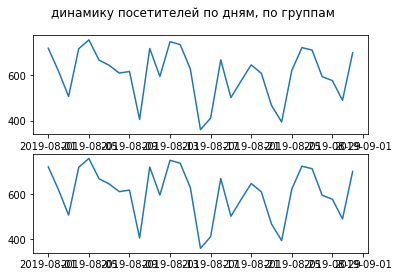

In [22]:
fig, axs = plt.subplots(nrows= 2 , ncols= 1 )
fig. suptitle('динамику посетителей по дням, по группам ')
axs[0].plot(visitors_groupA['date'], visitors_groupB['visitors'])
axs[1].plot(visitors_groupB['date'], visitors_groupB['visitors'])

Графики посещений очень похожи. Потому что, как мы видели в таблице выше динамика по группам не сильно отличается. Например, в 1 день в двух группах сделали по 490 человек покупки, а в другой 699 человек в группе А и 718 в группе В. Поэтому на графике они кажутся почти идентичными. 

In [23]:
#уберем явные дубликаты перед расчетом кумулятивных метрик
datesGroups = orders[['date','group']].drop_duplicates() 

In [24]:
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [25]:
#посмотрим равны ли группы А и В при выборке
datesGroups_lenA = len(datesGroups[datesGroups['group']== 'A'])

In [26]:
datesGroups_lenB = len(datesGroups[datesGroups['group']== 'B'])  
                
display('Количество людей в группе А равно:', datesGroups_lenA)      
display('Количество людей в группе B равно:', datesGroups_lenB)                          

'Количество людей в группе А равно:'

31

'Количество людей в группе B равно:'

31

In [27]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Видим, что количество людей равно.

In [28]:
#число уникальных заказов в группе теста по указанную дату включительно
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [29]:
#количество уникальных посетителей в группе теста по указанную дату включительно
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [30]:
ordersAggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 55 to 930
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           62 non-null     datetime64[ns]
 1   group          62 non-null     object        
 2   transactionId  62 non-null     int64         
 3   visitorId      62 non-null     int64         
 4   revenue        62 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ KB


In [31]:
#переведем столбец date в формат datetime
ordersAggregated['date'] = pd.to_datetime(ordersAggregated['date'])

In [32]:
#объединим таблицы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])      
# переназовем столбцы
cumulativeData.rename(columns = {'transactionId' : 'orders', 'visitorId' : 'buyers'}, inplace = True) 

In [33]:
# найдем минимальную и максимальную даты для графика
display('Минимальная дата для графика', min(cumulativeData['date']))
display('Максимальная дата для графика', max(cumulativeData['date']))

'Минимальная дата для графика'

Timestamp('2019-08-01 00:00:00')

'Максимальная дата для графика'

Timestamp('2019-08-31 00:00:00')

### Построим график кумулятивной выручки по группам.

In [34]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [35]:
# сохраним в переменных данные о датах, выручке и числе заказов в группах A и B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

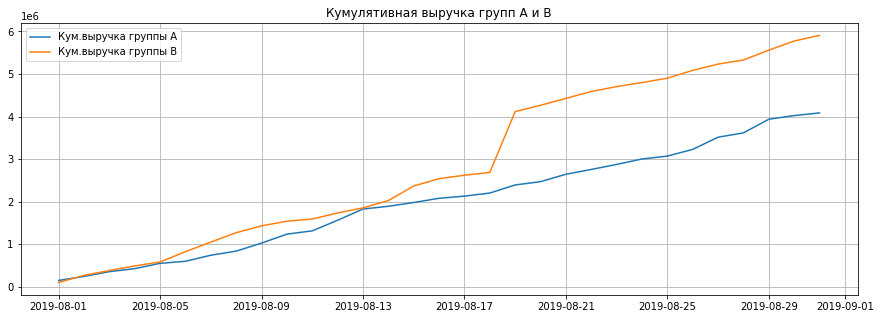

In [36]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.grid()
plt.title('Кумулятивная выручка групп А и В')
plt.legend() ;

Вначале кумулятивная выручка обеих групп идет вровень. Где-то с 5 августа выручка группы В выбивается вперед. 
13 числа выручки снова приравниваются друг к другу, а затем выручка группы В уверенно растет вверх. Особенно выделяется скачок группы В сделанный в 18-19 числа. Видимо тогда были произведены особо крупные заказы или возросло их количество.



### Построим график кумулятивного среднего чека по группам. 

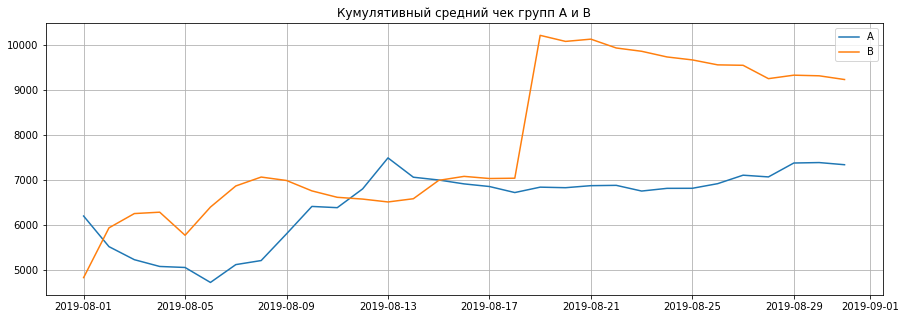

In [37]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.grid()
plt.title('Кумулятивный средний чек групп А и В');

In [38]:
# посмотрим почему кумулятивное среднее по чекам выше в группе В, чем в группе А
cumulativeRevenueA.head()
display(cumulativeRevenueA.sort_values(['date','orders', 'revenue']))
display(cumulativeRevenueB.sort_values(['date','orders', 'revenue']))

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109
10,2019-08-06,598401,127
12,2019-08-07,740818,145
14,2019-08-08,837097,161
16,2019-08-09,1025603,177
18,2019-08-10,1236098,193


,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101
11,2019-08-06,824337,129
13,2019-08-07,1049671,153
15,2019-08-08,1270589,180
17,2019-08-09,1431401,205
19,2019-08-10,1539203,228


Кумулятивное среднее по чекам в группе В по предварительной оценке выше, чем в группе А. Самый разкий скачок был в период с 18 по 19 число, когда группа В вырвалась в лидеры.

Потому что, в период с 17 по 21 в группе А было  311 чеков (за 17 августа) и 385 чеков (за 21 августа). А по выручке было 2 129 769  за 17 число и  2 643 838 за 21 число.

А в группе В на 17 число уже было 373 чека. А на 21 их стало 437, то есть в группе В люди покупают чаще. Также эта группа вырвалась в лидеры и по сумме. Если на 17 число кумулятивное среднее по чекам было 2 620 790, то за 18 число оно перевалило за 4  116 541 рублей. А к 21 августа достигло  4 426 892. То соответственно группа В опережает группу А по количеству чеков и по их сумме.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

In [39]:
#Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge()
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

No handles with labels found to put in legend.


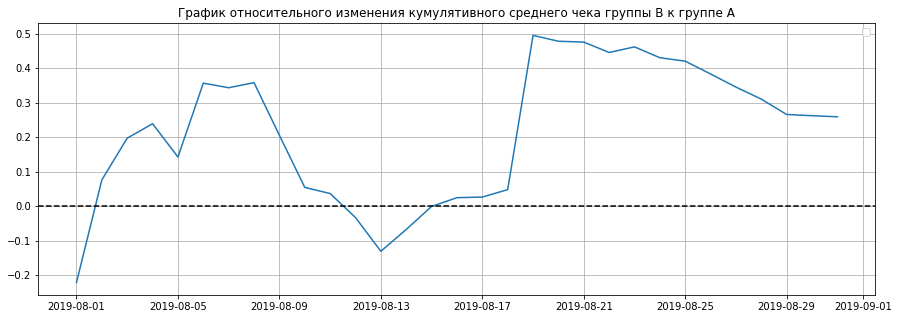

In [40]:
# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.legend() 
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

Результаты теста иногда значительно менялись в определенные даты. Видимо тогда были совершены аномальные заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 

In [41]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [42]:
# найдем минимальную и максимальную даты для графика
display('Минимальная дата для графика', min(cumulativeDataA['date']))
display('Максимальная дата для графика', max(cumulativeDataA['date']))

'Минимальная дата для графика'

Timestamp('2019-08-01 00:00:00')

'Максимальная дата для графика'

Timestamp('2019-08-31 00:00:00')

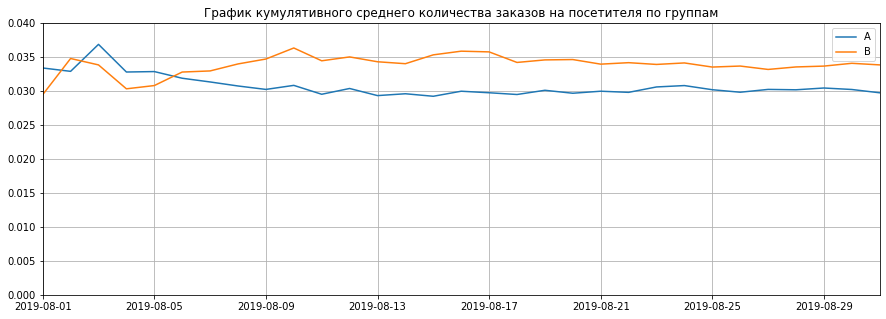

In [43]:
# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.04]);

Хотя вначале графика лидирует группа А, но потом со 2 августа вверх вырывается группа В.
Затем еще 3 числа был скачок, где  среднее количество заказов на посетителя выросло у группы А. Но после 6 августа группа В лидирует по этой метрике.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [44]:
# объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

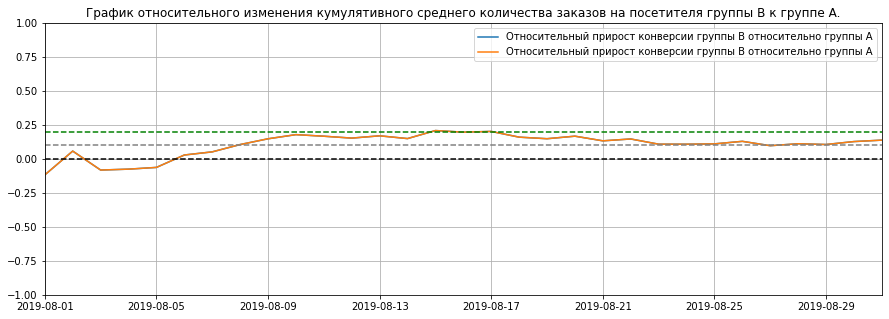

In [45]:
# строим график
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()


plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='green', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -1, 1]);

С 6 августа группа В начинает лидировать по конверсии. До этого первого числа была минусовая конверсия, затем 2 числа она выросла до 0.8 и до 6 августа снова ушла в минус. А после 6 августа уверенно начала расти.
Она лишь раз досигает порога в 20%, где-то с 15 по 17 августа. Затем начинает снижаться и с 23 августа уверенно держит прирост в 10% относительно группы А.

### Построим точечный график количества заказов по пользователям.

In [46]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [47]:
# Найдем число заказов по пользователям сделаем датафрейм c двумя столбцами: 'userId' и 'orders'. Назовем его ordersByUsers.
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

In [48]:
ordersByUsers.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [49]:
ordersByUsers.columns = ['visitorId', 'transactionId']

In [50]:
print(ordersByUsers.sort_values(by='transactionId', ascending=False).head(10)) 

       visitorId  transactionId
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5
744   3062433592              5
55     237748145              5
917   3803269165              5
299   1230306981              5
897   3717692402              5


No handles with labels found to put in legend.


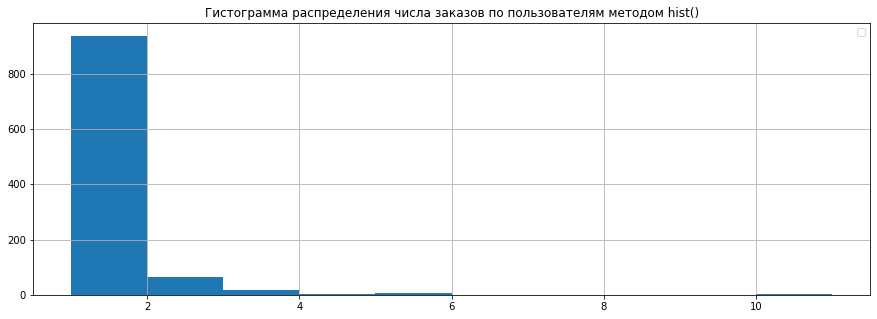

In [51]:
#Построим гистограмму распределения числа заказов по пользователям методом hist().
plt.figure(figsize=(15,5))
plt.legend() 
plt.grid()
plt.title('Гистограмма распределения числа заказов по пользователям методом hist()')
plt.hist(ordersByUsers['transactionId']);

Большинство пользователей совершило 1 заказ, таких пользователей было больше 800. Есть еще небольшое количество пользователей, которые совершили до 6 заказов и несколько аномальных пользователей, который сделал 10 заказов.

No handles with labels found to put in legend.


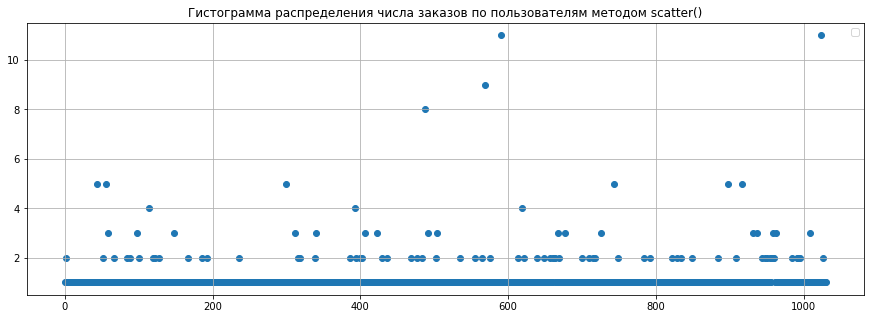

In [52]:
# Построим диаграмму методом scatter()
# серия из чисел от 0 до количества наблюдений в ordersByUsers

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.legend() 
plt.grid()
plt.title('Гистограмма распределения числа заказов по пользователям методом scatter()')
plt.scatter(x_values, ordersByUsers['transactionId']);

Большинство заказов распределены до 5 штук на человека. Но есть еще люди, которые заказали более 8-10 раз. Но их очень мало. В основном люди делают по 1-2 заказа.

In [53]:
ordersByUsers.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [54]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['transactionId'], [90, 95, 99])) 

[1. 2. 4.]


Сейчас 95 и 99 перцентили равны 2 и 4. Не больше 95% пользователей совершали 2 покупки и не больше 99% 4 покупки b более.

За аномалии мы примем тех людей, которые сделали заказ больше 6 раз. Дальше мы будем делать срез по очищенным данным и отбросим тех, кто делал заказы более 6 раз.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


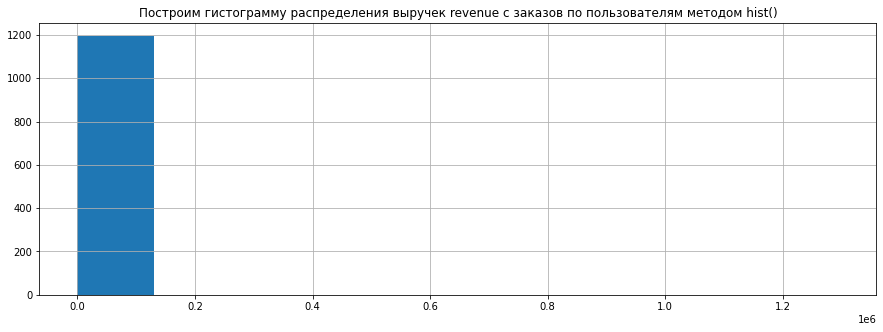

In [55]:
#Построим гистограмму распределения выручек ('revenue') с заказов по пользователям методом hist().
print(orders.sort_values(by='revenue', ascending=False).head(10))
plt.figure(figsize=(15,5)) 
plt.grid()
plt.title('Построим гистограмму распределения выручек revenue с заказов по пользователям методом hist()')
plt.hist(orders['revenue']);

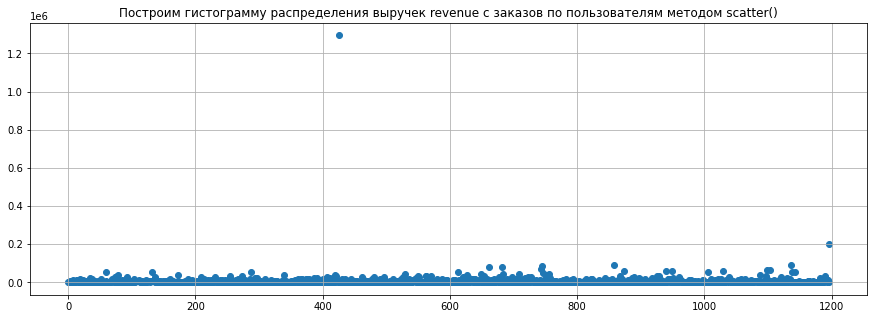

In [56]:
# Постройте диаграмму методом scatter().
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,5)) 
plt.grid()
plt.title('Построим гистограмму распределения выручек revenue с заказов по пользователям методом scatter()')
plt.scatter(x_values, orders['revenue']);

По графикам видно, что выручка с заказов по пользователям достигает 1200. И большинство пользвателей совершает не больше 1 заказа.

In [57]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным методом np.percentile().
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Не больше 5% заказов имеют чек дороже 28 000 рублей и не больше 1% чек более 58 000 рублей. А у 90% людей сумма покупок не превышает 18 000 рублей.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [58]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [59]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

In [60]:
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [61]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [62]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)

In [63]:
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [64]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [65]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [66]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [67]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

In [68]:
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [69]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [70]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [71]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [72]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

In [73]:
ordersByUsersA.head()

,visitorId,transactionId
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [74]:
#  создадим переменные ordersByUsersA, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
ordersByUsersA.columns = ['userId', 'orders']

In [75]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

In [76]:
#  создадим переменные ordersByUsersB, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
ordersByUsersB.columns = ['userId', 'orders'] 

In [77]:
# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [78]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [79]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

Применим статистический критерий Манна-Уитни к полученным выборкам. Нулевая гипотеза будет гласить: "статистических различий в среднем между группами нет". Альтернативная гипотеза гласит: "статистические различия в среднем между группами есть."

In [80]:
import scipy.stats as stats

print('alpha =', 0.05)
# Выведем p-value для сравнения среднего между группами.
print('p-value для сравнения среднего между группами:')
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Вычислим и выведем относительное различие в среднем между группами.
print('Относительное различие в среднем между группами:')
print("{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value для сравнения среднего между группами:
0.01679
Относительное различие в среднем между группами:
0.13808


p-value меньше, чем alpha. Значит мы можем отвергнуть нулевую гипотезу и принять во внимание альтернативную. Статистические различия в среднем между группами есть.
Значит по сырым данным различия в среднем чеке есть.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Применим статистический критерий Манна-Уитни к полученным выборкам. Нулевая гипотеза будет гласить: "статистических различий в среднем между группами нет". Альтернативная гипотеза гласит: "статистические различия в среднем между группами есть."

In [81]:
print('alpha =', 0.05)
# Выведем p-value для сравнения среднего между группами.
print('p-value для сравнения среднего между группами:')
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


alpha = 0.05
p-value для сравнения среднего между группами:
0.01679
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


p-value больше 0.05, а значит нулевую теорию мы отвергнуть не можем. Соответственно, статистические различия в среднем чеке между группами нет.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Чтобы очистить данные сделаем срезы пользователей с числом заказов меньше 6 — usersWithManyOrders и пользователей, совершивших заказы дешевле 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию. 

In [82]:
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [83]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
#срезы пользователей совершивших заказы дешевле 58233.2 — usersWithExpensiveOrders
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего ненормальных :) пользователей =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Всего ненормальных :) пользователей = 31


Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей. 

In [84]:
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [85]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

In [86]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0)

Так как ниже у меня неправильный расчет p-value, то проверим переменные по нескольким критериям.
1. В данных есть хоть один пропуск
2. Вместо выборки передается одно число
3. Передается пустая выборка



In [87]:
print('Пропусков в датасете sampleAFiltered', sampleAFiltered.isna().sum())
print('Пропусков в датасете sampleBFiltered', sampleBFiltered.isna().sum())

Пропусков в датасете sampleAFiltered 0
Пропусков в датасете sampleBFiltered 0


In [88]:
# пропусков нет, посмотрим, что передается в переменных
sampleAFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

Применим статистический критерий Манна-Уитни к полученным выборкам.
Нулевая гипотеза будет гласить: "статистически значимых различий в конверсии между группами нет".
Альтернативная гипотеза гласит - "статистически значимые различия есть".

In [89]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


p-value меньше, чем 0.05, значит мы можем отвергнуть нулевую гипотезу и принять во внимание альтернативную.
Статистические различия в среднем количестве заказов на посетителя между группами по очищенным данным есть.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза будет гласить: "статистически значимых различий в средних чеках между группами нет".
А альтернативная гипотеза гласит: "статистически значимые различия в среднем чеке между группами есть".

In [90]:
print("p-value:")
print('{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(
orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
]['revenue'],)[1]))
print("Относительный показатель 'B' и 'A':")
print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
/ orders[np.logical_and( orders['group'] == 'A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

p-value:
0.798
Относительный показатель 'B' и 'A':
-0.020


p-value больше, чем alpha. Значит мы не можем отвергнуть нулевую гипотезу. Соответственно статистически значимые различия в среднем чеке по очищенным данным отсутствуют.

# Выводы.

Пока тест проводился в тесте принимало участие 2 группы по 31 человеку в каждой.

Кумулятивное среднее по чекам в группе В по предварительной оценке выше, чем в группе А.

Результаты теста иногда значительно менялись в определенные даты. Видимо тогда были совершены аномальные заказы.

Графики посещений очень похожи. Потому что, как мы видели в таблице выше динамика по группам не сильно отличается. Например, в 1 день в двух группах сделали по 490 человек покупки, а в другой 699 человек в группе А и 718 в группе В. Поэтому на графике они кажутся почти идентичными.

Вначале кумулятивная выручка обеих групп идет вровень. Где-то с 5 августа выручка группы В выбивается вперед. 13 числа выручки снова приравниваются друг к другу, а затем выручка группы В уверенно растет вверх. Особенно выделяется скачок группы В сделанный в 18-19 числа. Видимо тогда были произведены особо крупные заказы или возросло их количество.

Кумулятивное среднее по чекам в группе В по предварительной оценке выше, чем в группе А. Самый разкий скачок был в период с 18 по 19 число, когда группа В вырвалась в лидеры.

Потому что, в период с 17 по 21 в группе А было 311 чеков (за 17 августа) и 385 чеков (за 21 августа). А по выручке было 2 129 769 за 17 число и 2 643 838 за 21 число.

А в группе В на 17 число уже было 373 чека. А на 21 их стало 437, то есть в группе В люди покупают чаще. Также эта группа вырвалась в лидеры и по сумме. Если на 17 число кумулятивное среднее по чекам было 2 620 790, то за 18 число оно перевалило за 4 116 541 рублей. А к 21 августа достигло 4 426 892. То соответственно группа В опережает группу А по количеству чеков и по их сумме.

С 6 августа группа В начинает лидировать по конверсии. До этого первого числа была минусовая конверсия, затем 2 числа она выросла до 0.8 и до 6 августа снова ушла в минус. А после 6 августа уверенно начала расти. Она лишь раз досигает порога в 20%, где-то с 15 по 17 августа. Затем начинает снижаться и с 23 августа уверенно держит прирост в 10% относительно группы А.

Большинство пользователей в тесте совершило 1-2 заказа. И 90% пользователей имели средний чек до 18 000 рублей.
Не больше 5% заказов имеют чек дороже 28 000 рублей и не больше 1% чек более 58 000 рублей. 

Соответственно, статистические различия в среднем чеке между группами по сырым данным есть. Статистические различия в среднем количестве заказов на посетителя между группами по очищенным данным есть. 
Соответственно статистически значимые различия в среднем чеке по очищенным данным отсутствуют.


Я считаю, что можно признать победу за группой В. Там больше людей совершало покупки. Это подтверждает и количество чеков и их сумма, которая выше, чем в группе А. А также и другие метрики, которые были описаны в выводе выше. Я думаю, на этом можно остановить тест и зафиксировать победу группы В.